<a href="https://colab.research.google.com/github/qkrtjsrbs315/linear_algebra2/blob/main/5%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

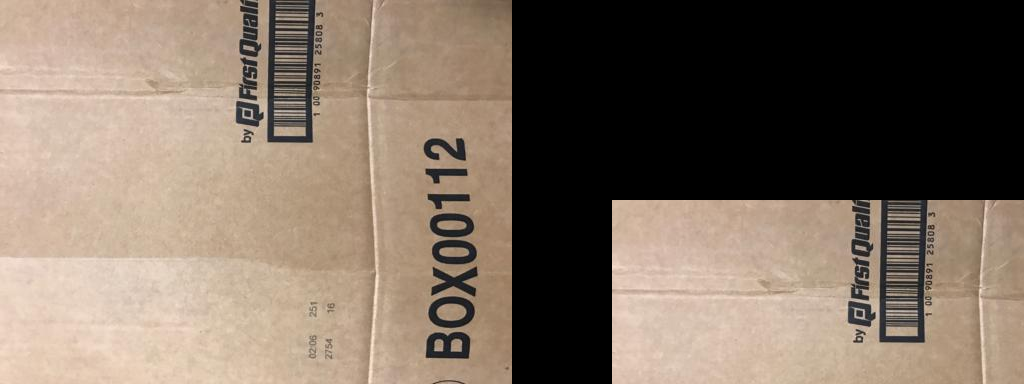

In [4]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

img_data='/content/drive/My Drive/new_data/cardboard10.jpg'

img = cv2.imread(img_data)
height,width=img.shape[:2]
M=np.array([[1,0,100],[0,1,200],[0,0,1]],dtype=float)

dst=np.zeros(img.shape,dtype=np.uint8)

for y in range(height-1):
  for x in range(width-1):
    p=np.array([x,y,1])
    p_=np.dot(M,p)
    x_,y_=p_[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_ >0 and y_<height:
      dst[y_,x_]=img[y,x]



result=cv2.hconcat([img,dst])
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# cv2.waitKey(0)

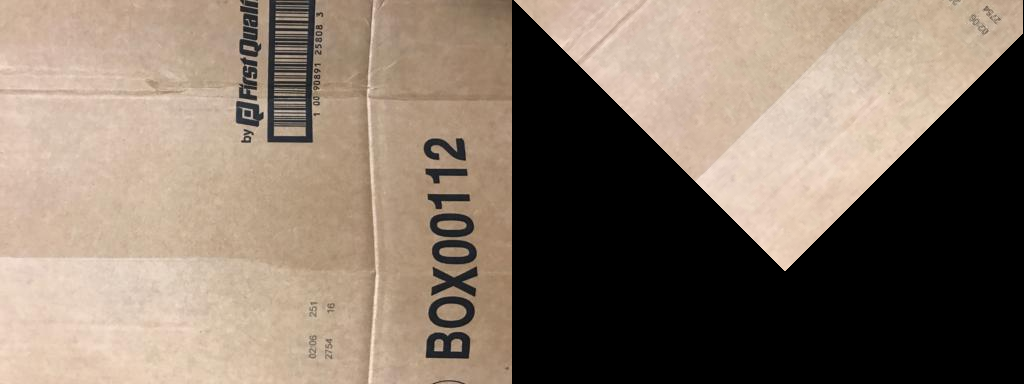

In [5]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

img_data='/content/drive/My Drive/new_data/cardboard10.jpg'

img = cv2.imread(img_data)
height,width=img.shape[:2]

angle = 45
radian = angle*np.pi/180
c = np.cos(radian)
s = np.sin(radian)

rotation_matrix = np.array([[c,s,0],[-s,c,0],[0,0,1]],dtype=float)
dst=np.zeros(img.shape,dtype=np.uint8)
for y in range(height-1):
  for x in range(width-1):
    new_p = np.array([x,y,1])
    inv_rotation_matrix=np.linalg.inv(rotation_matrix)
    old_p=np.dot(inv_rotation_matrix,new_p)

    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_ <height:
      dst[y,x]=img[y_,x_]
result = cv2.hconcat([img,dst])
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


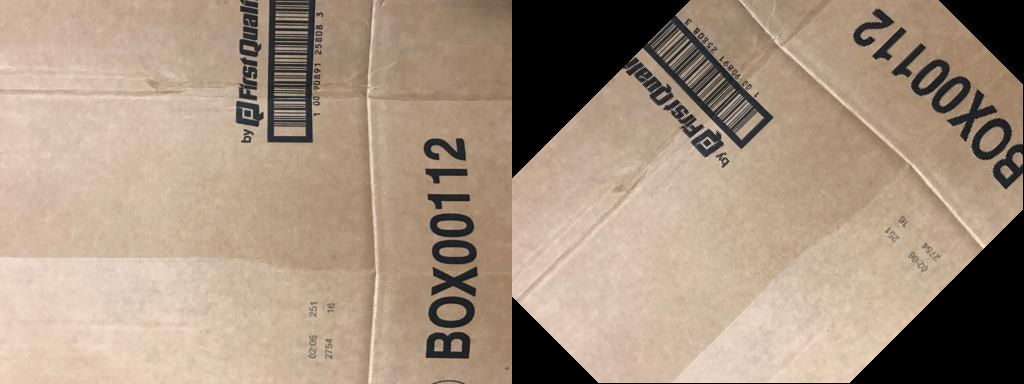

In [6]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

img_data='/content/drive/My Drive/new_data/cardboard10.jpg'

img = cv2.imread(img_data)
height,width=img.shape[:2]

angle = 45
radian = angle*np.pi/180
c = np.cos(radian)
s = np.sin(radian)
center_x=width/2
center_y=height/2

rotation_matrix = np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y],[0,0,1]],dtype=float)
dst=np.zeros(img.shape,dtype=np.uint8)
for y in range(height-1):
  for x in range(width-1):
    new_p = np.array([x,y,1])
    inv_rotation_matrix=np.linalg.inv(rotation_matrix)
    old_p=np.dot(inv_rotation_matrix,new_p)

    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_ <height:
      dst[y,x]=img[y_,x_]
result = cv2.hconcat([img,dst])
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


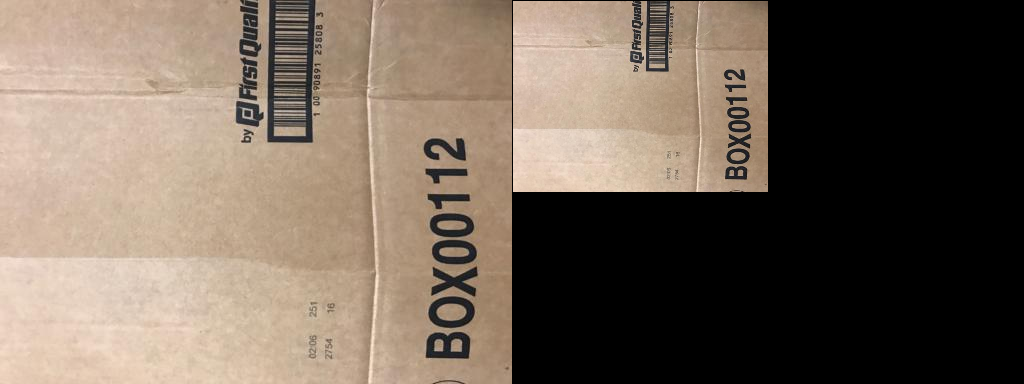

In [8]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

img_data='/content/drive/My Drive/new_data/cardboard10.jpg'

img = cv2.imread(img_data)
height,width=img.shape[:2]

scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)

for y in range(height):
  for x in range(width):
    new_p = np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(scaling_matrix)
    old_p=np.dot(inv_scaling_matrix,new_p)

    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_ <height:
        dst.itemset((y,x,0),img.item(y_,x_,0))
        dst.itemset((y,x,1),img.item(y_,x_,1))
        dst.itemset((y,x,2),img.item(y_,x_,2))


result = cv2.hconcat([img,dst])
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


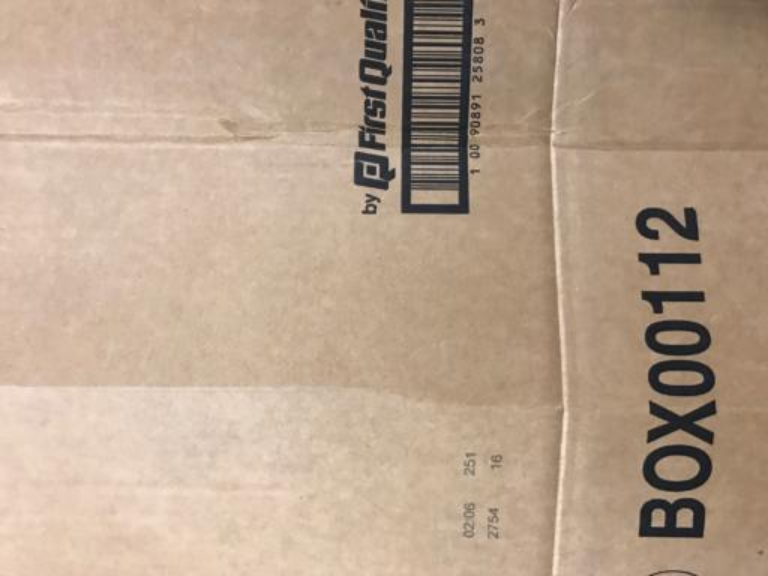

In [9]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

img_data='/content/drive/My Drive/new_data/cardboard10.jpg'

img = cv2.imread(img_data)
height,width=img.shape[:2]

dst = cv2.resize(img,(int(width*1.5),int(height*1.5)))

cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


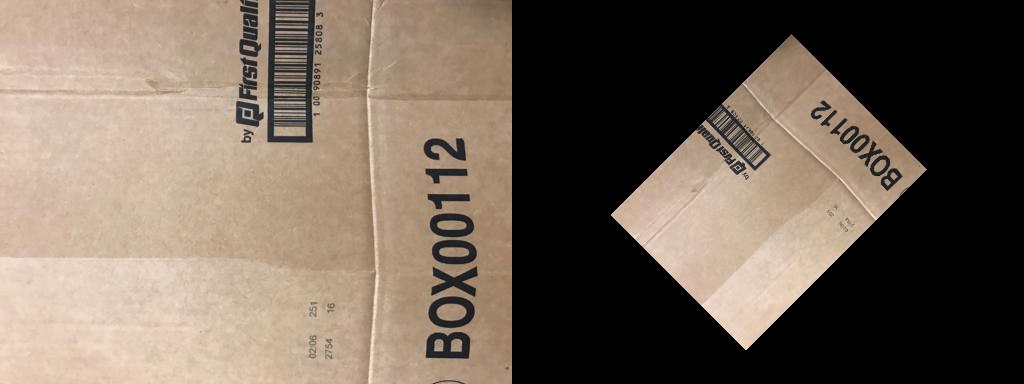

In [11]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

img_data='/content/drive/My Drive/new_data/cardboard10.jpg'

img = cv2.imread(img_data)
height,width=img.shape[:2]
angle=45
radian=angle*np.pi/180
c=np.cos(radian)
s=np.sin(radian)
center_x=width/2
center_y=height/2

scale_factor=0.5
scaling_matrix=np.array([[scale_factor,0,0],[0,scale_factor,0],[0,0,1]])
translation_matrix=np.array([[1,0,width/4],[0,1,height/4],[0,0,1]])
rotation_matrix = np.array([[c,s,(1-c)*center_x-s*center_y],[-s,c,s*center_x+(1-c)*center_y],[0,0,1]])
T=np.eye(3)
T=np.dot(scaling_matrix,T)
T=np.dot(translation_matrix,T)
T=np.dot(rotation_matrix,T)


dst=np.zeros((height,width,img.shape[2]),dtype=np.uint8)
for y in range(height):
  for x in range(width):
    new_p = np.array([x,y,1])
    inv_scaling_matrix=np.linalg.inv(T)
    old_p=np.dot(inv_scaling_matrix,new_p)

    x_,y_=old_p[:2]
    x_=int(x_)
    y_=int(y_)
    if x_>0 and x_<width and y_>0 and y_ <height:
        dst.itemset((y,x,0),img.item(y_,x_,0))
        dst.itemset((y,x,1),img.item(y_,x_,1))
        dst.itemset((y,x,2),img.item(y_,x_,2))


result = cv2.hconcat([img,dst])
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()